In [1]:
#News_Mood - twitter API, vaderAnalysis, matplotlib

# Dependencies

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import tweepy
import json
from config import (consumer_key, consumer_secret,
                    access_token, access_token_secret)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from datetime import datetime

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
news_outlets = ["BBC", "CBS", "CNN", "Fox", "@nytimes"]
tweet_times = []
tweet_sentiment_points = []
counter = 0
val = 0
index = np.arange(0,100)
#my_array = np.arange(0,10)
my_array = np.array([np.arange(100)]*1).T
df = pd.DataFrame(my_array, index=index, columns=["Sentiment Points"])
lcv = 0

B_array=[]
CB_array=[]
CN_array=[]
F_array=[]
N_array=[]

tweet_time_array=[B_array,CB_array,CN_array,F_array,N_array]

BBC_array=[]
CBS_array=[]
CNN_array=[]
Fox_array=[]
NY_array=[]

BBC_pos=[]
CBS_pos=[]
CNN_pos=[]
Fox_pos=[]
NY_pos=[]

BBC_neg=[]
CBS_neg=[]
CNN_neg=[]
Fox_neg=[]
NY_neg=[]

BBC_neu=[]
CBS_neu=[]
CNN_neu=[]
Fox_neu=[]
NY_neu=[]

tweet_sents = [BBC_array,CBS_array,CNN_array,Fox_array,NY_array]
positive_tweets = [BBC_pos,CBS_pos,CNN_pos,Fox_pos,NY_pos]
neutral_tweets = [BBC_neu,CBS_neu,CNN_neu,Fox_neu,NY_neu]
negative_tweets = [BBC_neg,CBS_neg,CNN_neg,Fox_neg,NY_neg]

In [3]:
for my_counter in news_outlets:
#get the last 100 tweets for bbc
    target_user = news_outlets[lcv]
    for x in range(1, 6):
        public_tweets = api.user_timeline(target_user, page = x)
    # Loop through all tweets
        for tweet in public_tweets:
        
        # Store all tweet times into the array
            tweet_time_array[lcv].append(tweet["created_at"])
            #tweet_times.append(tweet["created_at"])
        
        #Calculate the sentiment value and run analysis
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            
            # Run analysis
            #compound = results["compound"]
            positive = results["pos"]
            neutral = results["neu"]
            negative = results["neg"]
            
           
            negative_tweets[lcv].append(negative) #add datapoint for negative
            neutral_tweets[lcv].append(neutral)   #add datapoint for neutral 
            positive_tweets[lcv].append(positive) #add datapoint for positive 
            tweet_sents[lcv].append(compound)     #add datapoint for compound
        
            counter += 1
        
        # Print tweets for preview
            if counter % 100 == 0:
                print(tweet["created_at"])
# Confirm tweet counts
        
    len(tweet_times)
#df["BBC Sentiment points"] = tweet_sentiment_points  
    my_string = news_outlets[lcv] + str(" Compound Sentiment")
    pos_string = news_outlets[lcv] + str(" Positive Sentiment")
    
    negative_string = news_outlets[lcv] + str(" Negative Sentiment")
    neutral_string = news_outlets[lcv] + str(" Neutral Sentiment")
    
    
    df[str(my_string)] = tweet_sents[lcv] 
    df[str(pos_string)] = positive_tweets[lcv]
    
    df[str(negative_string)] = negative_tweets[lcv]
    df[str(neutral_string)] = neutral_tweets[lcv]
    
    print(len(tweet_sents[lcv]))
    lcv += 1

Tue Jul 31 13:00:23 +0000 2018
100
Fri Jul 06 22:22:55 +0000 2018
100
Tue Aug 07 17:29:04 +0000 2018
100
Mon Jul 02 23:15:52 +0000 2018
100
Tue Aug 07 00:32:05 +0000 2018
100


In [4]:
#tweet_velocity that's from Day 1 Activity 9
#to get a relative timestamp, need to have multiple arrays


In [5]:
#plt.scatter(range(len(df)), df["@nytimes Sentiment Points"]) #can change names to get different plots

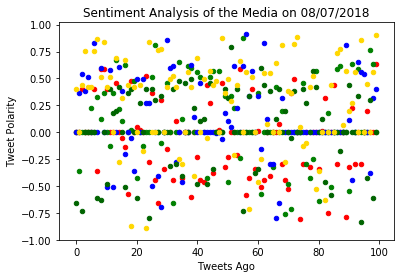

In [6]:
#organize the info into a dataframe
#df = pd.DataFrame(np.random.randn(100, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])


ax1 = df.plot(kind='scatter', x="Sentiment Points", y="@nytimes Compound Sentiment", color='r')    
ax2 = df.plot(kind='scatter', x="Sentiment Points", y="BBC Compound Sentiment", color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Sentiment Points', y="CBS Compound Sentiment", color='b', ax=ax1)
ax4 = df.plot(kind='scatter', x='Sentiment Points', y="CNN Compound Sentiment", color='darkgreen', ax=ax1)
ax5 = df.plot(kind='scatter', x='Sentiment Points', y="Fox Compound Sentiment", color='gold', ax=ax1)
date = datetime.today().strftime("%m/%d/%Y")
plt.title("Sentiment Analysis of the Media on " + str(date))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.savefig("media_popularity_analysis.png")

In [7]:
df.head()

,Sentiment Points,BBC Compound Sentiment,BBC Positive Sentiment,BBC Negative Sentiment,BBC Neutral Sentiment,CBS Compound Sentiment,CBS Positive Sentiment,CBS Negative Sentiment,CBS Neutral Sentiment,CNN Compound Sentiment,...,CNN Negative Sentiment,CNN Neutral Sentiment,Fox Compound Sentiment,Fox Positive Sentiment,Fox Negative Sentiment,Fox Neutral Sentiment,@nytimes Compound Sentiment,@nytimes Positive Sentiment,@nytimes Negative Sentiment,@nytimes Neutral Sentiment
0,0,0.0000,0.000,0.000,1.000,0.0000,0.000,0.000,1.000,-0.6597,...,0.278,0.648,0.4019,0.153,0.0,0.847,0.0000,0.000,0.0,1.000
1,1,-0.3612,0.146,0.215,0.639,0.3612,0.111,0.000,0.889,0.0000,...,0.000,1.000,0.0000,0.000,0.0,1.000,0.0000,0.000,0.0,1.000
2,2,0.0000,0.000,0.000,1.000,0.5411,0.219,0.098,0.683,-0.7269,...,0.319,0.681,0.4404,0.132,0.0,0.868,0.4019,0.114,0.0,0.886
3,3,0.0000,0.000,0.000,1.000,0.3818,0.106,0.000,0.894,0.0000,...,0.000,1.000,0.7574,0.245,0.0,0.755,0.0000,0.000,0.0,1.000
4,4,0.0000,0.000,0.000,1.000,0.5093,0.155,0.000,0.845,0.0000,...,0.000,1.000,0.4199,0.482,0.0,0.518,0.0000,0.000,0.0,1.000


In [8]:
df.to_csv("Media_Analysis.csv")

In [9]:
bar_data_BBC = df["BBC Compound Sentiment"].mean()

In [10]:
bar_data_CBS = df["CBS Compound Sentiment"].mean()

In [11]:
bar_data_CNN = df["CNN Compound Sentiment"].mean()

In [12]:
bar_data_FOX = df["Fox Compound Sentiment"].mean()

In [13]:
bar_data_NY = df["@nytimes Compound Sentiment"].mean()
data = [bar_data_BBC,bar_data_CBS,bar_data_CNN,bar_data_FOX,bar_data_NY]
colors = ["red","green","blue","gold","pink"]

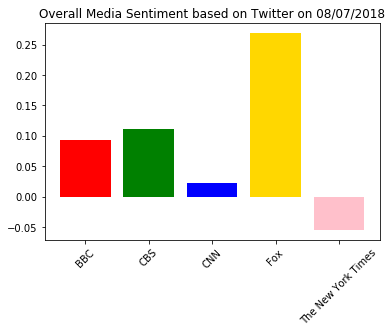

In [14]:
plt.bar(range(len(data)), data,color=colors)
plt.title("Overall Media Sentiment based on Twitter on "+str(date))
#plt.xticks(range(len(delayed_trains_pd.index)), delayed_trains_pd.index, rotation=45)
plt.xticks(range(len(data)), ["BBC", "CBS", "CNN", "Fox", "The New York Times"], rotation=45)
plt.savefig("media_bar_chart.png")